# LAB ASSIGNMENT - 01

A1. Segregation of the matrix into A and C

In [3]:
import pandas as pd
import numpy as np
from numpy import linalg as la
import statistics
import matplotlib.pyplot as plt

In [5]:
data=pd.read_excel(r'C:\Users\91981\Downloads\Lab Session1 Data (1).xlsx',sheet_name='Purchase data')
B=data.iloc[:,1:4]          #Fetching the values whatever is required
X=data.iloc[:,4]
C=X.values                  #Converting the fetched values into matrix directly
A=B.values
print(A,"\n")
print(C)

[[20  6  2]
 [16  3  6]
 [27  6  2]
 [19  1  2]
 [24  4  2]
 [22  1  5]
 [15  4  2]
 [18  4  2]
 [21  1  4]
 [16  2  4]] 

[386 289 393 110 280 167 271 274 148 198]


A1.1 Dimensionality of the Matrix formed

In [6]:
print(data.shape,"\t",data.ndim)   #ndim:(row,column=2 dimension) 
                                   #shape:(num rows, num column)

(10, 22) 	 2


A1.2 Number of vectors in the vector space

In [7]:
print(len(data))                  #len():

10


A1.3 Rank of a Matrix

In [8]:
print("Rank of Matrix: ",la.matrix_rank(A))

Rank of Matrix:  3


A1.4 Using Pseudo-Inverse find the cost of each product available for sale.

A2. Use the Pseudo-inverse to calculate the model vector X for predicting the cost of the products 
available with the vendor

In [9]:
inverse=la.pinv(A)
X=np.dot(inverse,C)
print(X)

[ 1. 55. 18.]


A3.Mark all customers (in “Purchase Data” table) with payments above Rs. 200 as RICH and others as POOR. Develop a classifier model to categorize customers into RICH or POOR class based on purchase behavior. 

In [10]:
data['Class'] = np.where(data['Payment (Rs)'] > 200,'R','P')
df_cleaned = data.dropna(axis=1, how='any')
print(df_cleaned)

  Customer  Candies (#)  Mangoes (Kg)  Milk Packets (#)  Payment (Rs) Class
0      C_1           20             6                 2           386     R
1      C_2           16             3                 6           289     R
2      C_3           27             6                 2           393     R
3      C_4           19             1                 2           110     P
4      C_5           24             4                 2           280     R
5      C_6           22             1                 5           167     P
6      C_7           15             4                 2           271     R
7      C_8           18             4                 2           274     R
8      C_9           21             1                 4           148     P
9     C_10           16             2                 4           198     P


A4.Please refer to the data present in “IRCTC Stock Price” data sheet of the above excel file. Do the following after loading the data to your programming platform.

A4.1 Calculate the mean and variance of the Price data present in column D.

In [11]:
data=pd.read_excel(r'C:\Users\91981\Downloads\Lab Session1 Data (1).xlsx',sheet_name='IRCTC Stock Price')
mean=statistics.mean(data['Price'])
print("Mean of the Prices is: ",mean)

Mean of the Prices is:  1560.663453815261


In [12]:
var=statistics.variance(data['Price'])
print("Variance of the Prices is: ",var)

Variance of the Prices is:  58732.365352539186


A4.2 Select the price data for all Wednesdays and calculate the sample mean. Compare the mean with the population mean and note your observations.

In [13]:
pr_m=statistics.mean(data['Price'].loc[data['Day']=="Wed"])
print("Price of Wednesday", pr_m)

Price of Wednesday 1550.706


A4.3 Select the price data for the month of Apr and calculate the sample mean. Compare the 
mean with the population mean and note your observations

In [14]:
a_m= statistics.mean(data['Price'].loc[data['Month']=='Apr'])
print("Price of April: ",a_m)

Price of April:  1698.9526315789474


A4.4 From the Chg% (available in column I) find the probability of making a loss over the stock. 
(Suggestion: use lambda function to find negative values)

In [15]:
chg = data['Chg%']
neg = chg[lambda x: x < 0]

probability_of_loss = len(neg) / len(chg)

print("Probability of loss:", probability_of_loss)


Probability of loss: 0.4979919678714859


A4.5 Calculate the probability of making a profit on Wednesday.

In [16]:
t=data['Chg%'].count()
w=data['Chg%'].loc[data['Day']=='Wed'].count()
p = data['Chg%'].loc[(data['Day'] == 'Wed') & (data['Chg%'] >0)]
p=p.count()
print("Probability of Profit on Wednesday: ",p/t)

Probability of Profit on Wednesday:  0.08433734939759036


A4.6 Calculate the conditional probability of making profit, given that today is Wednesday.

In [17]:
print("Today's Profit: ",p/w)

Today's Profit:  0.42


A4.7 Make a scatter plot of Chg% data against the day of the week.

Text(0.5, 1.0, 'Days vs Chg%')

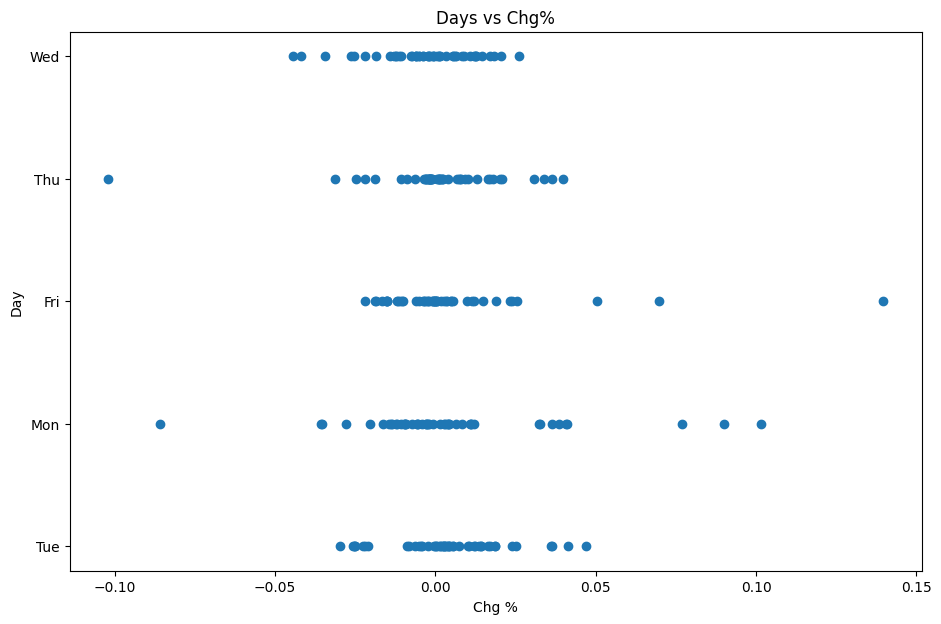

In [18]:
fig, ax = plt.subplots(figsize=(11, 7))
ax.scatter(x = data['Chg%'], y = data['Day'])
plt.xlabel("Chg %")
plt.ylabel("Day")
plt.title("Days vs Chg%")